In [3]:
import numpy as np
from itertools import product
import ctypes as c
from ROOT import TFile
from Plotter.PlotterTools.Kinematics import Kinematics
from Plotter.PlotterTools.ObsAndExp import ObsAndExp 
from Conversion.measConvSF import get_conv_sf

Welcome to JupyROOT 6.24/00


In [4]:

def get_hist(sample, channel, mass_point, region, histkey, syst="Central"):
    if sample == "fake":
        fkey = f"Outputs/{channel}/{mass_point}/DATA.root"
    else:
        fkey = f"Outputs/{channel}/{mass_point}/{sample}.root"
    histkey = f"{sample}/{region}/{syst}/{histkey}"
    
    f = TFile.Open(fkey)
    h = f.Get(histkey)
    h.SetDirectory(0)
    f.Close()
    
    if h is None:
        print(f"null histogram for {sample} with {histkey}")
    
    return h

In [5]:
histkey = "DiMuon/mass"
channel = "1E2Mu"
mass_point = "MHc160_MA155"
signal = f"TTToHcToWA_AToMuMu_{mass_point}"
prompts = ['rare', 'ttX', 'VV']

signals = dict()
h_sig = get_hist(signal, channel, mass_point, region="SR", histkey=histkey)
signals['MHc70_MA15'] = get_hist(f"TTToHcToWA_AToMuMu_MHc70_MA15", channel, "MHc70_MA15", region="SR", histkey=histkey)
signals['MHc160_MA155'] = get_hist(f"TTToHcToWA_AToMuMu_MHc160_MA155", channel, "MHc160_MA155", region="SR", histkey=histkey)
signals['MHc130_MA90'] = get_hist(f"TTToHcToWA_AToMuMu_MHc130_MA90", channel, "MHc130_MA90", region="SR", histkey=histkey) 
#signals[mass_point] = h_sig

hists = dict()
"""fake"""
h_fake = get_hist("fake", channel, mass_point, region='SR', histkey=histkey)
h_fake_up = get_hist("fake", channel, mass_point, region="SR", histkey=histkey, syst="Up")
h_fake_down = get_hist("fake", channel, mass_point, region="SR", histkey=histkey, syst="Down")

for bin in range(h_fake.GetNbinsX()+1):
    center = h_fake.GetBinContent(bin)
    up = h_fake_up.GetBinContent(bin) - center
    down = center - h_fake_down.GetBinContent(bin)
    error = np.sqrt(np.power(h_fake.GetBinError(bin), 2) + np.power(up, 2) + np.power(down, 2))
    h_fake.SetBinError(bin, error)
hists['fake'] = h_fake

"""conversion"""
h_DY = get_hist("DY", channel, mass_point, region="SR", histkey=histkey)
DY_sf, DY_err = get_conv_sf(channel, "DY")
h_DY_center = h_DY.Clone("DY_center"); h_DY_center.Scale(DY_sf)
h_DY_up = h_DY.Clone("DY_up"); h_DY_up.Scale(DY_sf + DY_err)
h_DY_down = h_DY.Clone("DY_down"); h_DY_down.Scale(DY_sf - DY_err)
h_DY.Scale(DY_sf)
for bin in range(h_DY.GetNbinsX()+1):
    center = h_DY_center.GetBinContent(bin)
    up = h_DY_up.GetBinContent(bin) - center
    down = center - h_DY_down.GetBinContent(bin)
    error = np.sqrt(np.power(h_DY_center.GetBinError(bin), 2) + np.power(up, 2) + np.power(down, 2))
    h_DY.SetBinError(bin, error)
h_conv = h_DY.Clone("conv")

h_ZG = get_hist("ZG", channel, mass_point, region="SR", histkey=histkey)
ZG_sf, ZG_err = get_conv_sf(channel, "ZG")
h_ZG_center = h_ZG.Clone("ZG_center"); h_ZG_center.Scale(ZG_sf)
h_ZG_up = h_ZG.Clone("ZG_up"); h_ZG_up.Scale(ZG_sf + ZG_err)
h_ZG_down = h_ZG.Clone("ZG_down"); h_ZG_down.Scale(ZG_sf - ZG_err)
h_ZG.Scale(ZG_sf)
for bin in range(h_ZG.GetNbinsX()+1):
    center = h_ZG_center.GetBinContent(bin)
    up = h_ZG_up.GetBinContent(bin) - center
    down = center - h_ZG_down.GetBinContent(bin)
    error = np.sqrt(np.power(h_ZG_center.GetBinError(bin), 2) + np.power(up, 2) + np.power(down, 2))
    h_ZG.SetBinError(bin, error)
h_conv.Add(h_ZG)
hists['conv'] = h_conv

# prompts
for mc in prompts:
    hists[mc] = get_hist(mc, channel, mass_point, region="SR", histkey=histkey)

INFO: Storing histograms...
INFO: Histograms will be automatically normalized
INFO: Automatically set y axis range


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


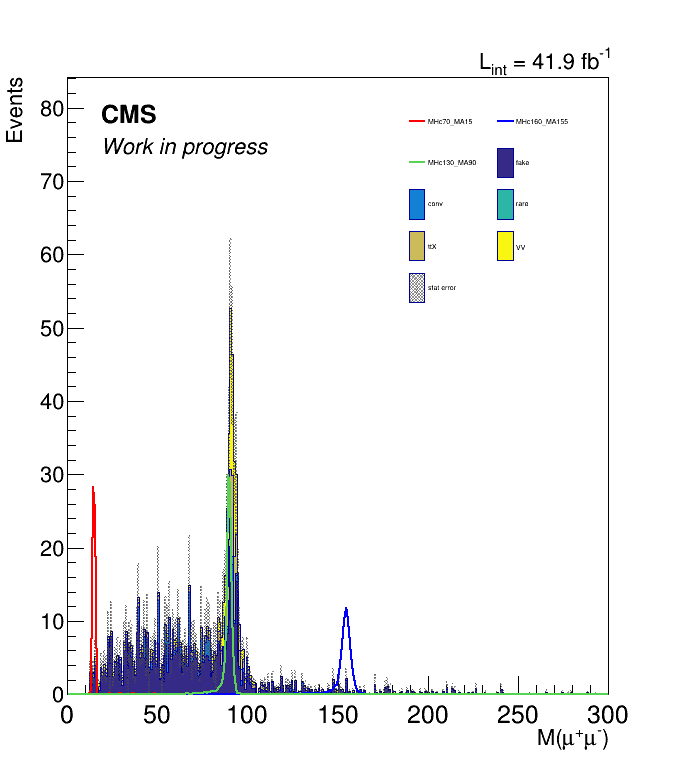

In [6]:
cvs_params = {
    "logy": False,
    "grid": False
}
info_params = {
    "info": "L_{int} = 41.9 fb^{-1}",
    "cms_text": "CMS",
    "extra_text": "Work in progress"
}
hist_params = {
    "x_title": "M(#mu^{+}#mu^{-})",
    "x_range": [0., 300.],
    "ratio_range": [0., 2.],
    #"rebin": 2,
    "y_title": "Events",
}

plotter = Kinematics(cvs_params, hist_params, info_params)
plotter.get_hists(signals, hists)
plotter.combine()
plotter.draw()

In [5]:
"""CUT AND COUNT using GRID SEARCH"""
# using dimuon distribution only
histkey = "mMuMu"
channel = "1E2Mu"
mass_point = "MHc160_MA155"
signal = f"TTToHcToWA_AToMuMu_{mass_point}"
prompts = ['rare', 'ttX', 'VV']

signals = dict()
h_sig = get_hist(signal, channel, mass_point, region="SR", histkey=histkey)
signals[mass_point] = h_sig

hists = dict()
"""fake"""
h_fake = get_hist("fake", channel, mass_point, region='SR', histkey=histkey)
h_fake_up = get_hist("fake", channel, mass_point, region="SR", histkey=histkey, syst="Up")
h_fake_down = get_hist("fake", channel, mass_point, region="SR", histkey=histkey, syst="Down")

for bin in range(h_fake.GetNbinsX()+1):
    center = h_fake.GetBinContent(bin)
    up = h_fake_up.GetBinContent(bin) - center
    down = center - h_fake_down.GetBinContent(bin)
    error = np.sqrt(np.power(h_fake.GetBinError(bin), 2) + np.power(up, 2) + np.power(down, 2))
    h_fake.SetBinError(bin, error)
hists['fake'] = h_fake

"""conversion"""
h_DY = get_hist("DY", channel, mass_point, region="SR", histkey=histkey)
DY_sf, DY_err = get_conv_sf(channel, "DY")
h_DY_center = h_DY.Clone("DY_center"); h_DY_center.Scale(DY_sf)
h_DY_up = h_DY.Clone("DY_up"); h_DY_up.Scale(DY_sf + DY_err)
h_DY_down = h_DY.Clone("DY_down"); h_DY_down.Scale(DY_sf - DY_err)
h_DY.Scale(DY_sf)
for bin in range(h_DY.GetNbinsX()+1):
    center = h_DY_center.GetBinContent(bin)
    up = h_DY_up.GetBinContent(bin) - center
    down = center - h_DY_down.GetBinContent(bin)
    error = np.sqrt(np.power(h_DY_center.GetBinError(bin), 2) + np.power(up, 2) + np.power(down, 2))
    h_DY.SetBinError(bin, error)
h_conv = h_DY.Clone("conv")

h_ZG = get_hist("ZG", channel, mass_point, region="SR", histkey=histkey)
ZG_sf, ZG_err = get_conv_sf(channel, "ZG")
h_ZG_center = h_ZG.Clone("ZG_center"); h_ZG_center.Scale(ZG_sf)
h_ZG_up = h_ZG.Clone("ZG_up"); h_ZG_up.Scale(ZG_sf + ZG_err)
h_ZG_down = h_ZG.Clone("ZG_down"); h_ZG_down.Scale(ZG_sf - ZG_err)
h_ZG.Scale(ZG_sf)
for bin in range(h_ZG.GetNbinsX()+1):
    center = h_ZG_center.GetBinContent(bin)
    up = h_ZG_up.GetBinContent(bin) - center
    down = center - h_ZG_down.GetBinContent(bin)
    error = np.sqrt(np.power(h_ZG_center.GetBinError(bin), 2) + np.power(up, 2) + np.power(down, 2))
    h_ZG.SetBinError(bin, error)
h_conv.Add(h_ZG)
hists['conv'] = h_conv

# prompts
for mc in prompts:
    hists[mc] = get_hist(mc, channel, mass_point, region="SR", histkey=histkey)

mA = 155.
significance = 0.
window = 0.
for delta in np.linspace(0., 5., 50):
    delta = round(delta, 1)
    N_sig, N_bkg = 0., 0.
    N_sig = h_sig.Integral(h_sig.FindBin(mA-delta), h_sig.FindBin(mA+delta))
    for name, hist in hists.items():
        error = c.c_double(0.)
        bkg = hist.IntegralAndError(hist.FindBin(mA-delta), hist.FindBin(mA+delta), error, "")
        #print(f"{name}: {error.value}")
        N_bkg += bkg + np.power(error.value, 2)
    this_sign = N_sig / np.sqrt(N_bkg)
    if this_sign > significance:
        significance, window = this_sign, delta

print(f"Maximum significance {significance} with window {window}")

Maximum significance 21.726030928450555 with window 4.4


In [6]:
histkey = "fake_ttX_mMM"
channel = "1E2Mu"
mass_point = "MHc160_MA155"
signal = f"TTToHcToWA_AToMuMu_{mass_point}"
prompts = ['rare', 'ttX', 'VV']

signals = dict()
h_sig = get_hist(signal, channel, mass_point, region="SR", histkey=histkey)
signals[mass_point] = h_sig

hists = dict()
"""fake"""
h_fake = get_hist("fake", channel, mass_point, region='SR', histkey=histkey)
h_fake_up = get_hist("fake", channel, mass_point, region="SR", histkey=histkey, syst="Up")
h_fake_down = get_hist("fake", channel, mass_point, region="SR", histkey=histkey, syst="Down")

for bin in range(h_fake.GetNcells()+1):
    center = h_fake.GetBinContent(bin)
    up = h_fake_up.GetBinContent(bin) - center
    down = center - h_fake_down.GetBinContent(bin)
    error = np.sqrt(np.power(h_fake.GetBinError(bin), 2) + np.power(up, 2) + np.power(down, 2))
    h_fake.SetBinError(bin, error)
hists['fake'] = h_fake

"""conversion"""
h_DY = get_hist("DY", channel, mass_point, region="SR", histkey=histkey)
DY_sf, DY_err = get_conv_sf(channel, "DY")
h_DY_center = h_DY.Clone("DY_center"); h_DY_center.Scale(DY_sf)
h_DY_up = h_DY.Clone("DY_up"); h_DY_up.Scale(DY_sf + DY_err)
h_DY_down = h_DY.Clone("DY_down"); h_DY_down.Scale(DY_sf - DY_err)
h_DY.Scale(DY_sf)
for bin in range(h_DY.GetNcells()+1):
    center = h_DY_center.GetBinContent(bin)
    up = h_DY_up.GetBinContent(bin) - center
    down = center - h_DY_down.GetBinContent(bin)
    error = np.sqrt(np.power(h_DY_center.GetBinError(bin), 2) + np.power(up, 2) + np.power(down, 2))
    h_DY.SetBinError(bin, error)
h_conv = h_DY.Clone("conv")

h_ZG = get_hist("ZG", channel, mass_point, region="SR", histkey=histkey)
ZG_sf, ZG_err = get_conv_sf(channel, "ZG")
h_ZG_center = h_ZG.Clone("ZG_center"); h_ZG_center.Scale(ZG_sf)
h_ZG_up = h_ZG.Clone("ZG_up"); h_ZG_up.Scale(ZG_sf + ZG_err)
h_ZG_down = h_ZG.Clone("ZG_down"); h_ZG_down.Scale(ZG_sf - ZG_err)
h_ZG.Scale(ZG_sf)
for bin in range(h_ZG.GetNcells()+1):
    center = h_ZG_center.GetBinContent(bin)
    up = h_ZG_up.GetBinContent(bin) - center
    down = center - h_ZG_down.GetBinContent(bin)
    error = np.sqrt(np.power(h_ZG_center.GetBinError(bin), 2) + np.power(up, 2) + np.power(down, 2))
    h_ZG.SetBinError(bin, error)
h_conv.Add(h_ZG)
hists['conv'] = h_conv

# prompts
for mc in prompts:
    hists[mc] = get_hist(mc, channel, mass_point, region="SR", histkey=histkey)

In [7]:
mA = 155.
significance = 0.
fake_cut = 0.
ttX_cut = 0.
window = 0.
f_space = np.linspace(0., 1., 100)
t_space = np.linspace(0., 1., 100)
m_space = np.linspace(0., 5., 50)

for f_step, t_step, delta in product(f_space, t_space, m_space):
    f_step, t_step = round(f_step, 2), round(t_step, 2)
    delta = round(delta, 1)
    x_min, x_max = h_sig.GetXaxis().FindBin(f_step), h_sig.GetXaxis().FindBin(1.)
    y_min, y_max = h_sig.GetYaxis().FindBin(t_step), h_sig.GetYaxis().FindBin(1.)
    z_min, z_max = h_sig.GetZaxis().FindBin(mA-delta), h_sig.GetZaxis().FindBin(mA+delta)
    
    N_sig, N_bkg = 0., 0.
    N_sig = h_sig.Integral(x_min, x_max, y_min, y_max, z_min, z_max)
    for name, hist in hists.items():
        error = c.c_double(0.)
        bkg = hist.IntegralAndError(x_min, x_max, y_min, y_max, z_min, z_max, error, "")
        #print(f"{name}: {error.value}")
        N_bkg += bkg + np.power(error.value, 2)
    if N_bkg == 0.:
        continue
    this_sign = N_sig / np.sqrt(N_bkg)
    if this_sign > significance:
        significance, window = this_sign, delta
        fake_cut, ttX_cut = f_step, t_step
    
    if delta == 5.:
        print(f"current best significance with f_step/t_step {f_step}/{t_step}: {significance} with window {window}")

print(f"Maximum significance {significance} with window {window}, fake cut {fake_cut}, ttX cut {ttX_cut}")

current best significance with f_step/t_step 0.0/0.0: 21.790467541627578 with window 4.4
current best significance with f_step/t_step 0.0/0.01: 49.74403846750949 with window 1.8
current best significance with f_step/t_step 0.0/0.02: 49.9495882679499 with window 1.8
current best significance with f_step/t_step 0.0/0.03: 50.68987948134375 with window 1.8
current best significance with f_step/t_step 0.0/0.04: 50.82409289818978 with window 1.8
current best significance with f_step/t_step 0.0/0.05: 50.895032825479525 with window 1.8
current best significance with f_step/t_step 0.0/0.06: 51.03505906229144 with window 1.8
current best significance with f_step/t_step 0.0/0.07: 51.273270640617795 with window 1.8
current best significance with f_step/t_step 0.0/0.08: 51.36729203874268 with window 1.8
current best significance with f_step/t_step 0.0/0.09: 51.46370591483329 with window 1.8
current best significance with f_step/t_step 0.0/0.1: 51.46370591483329 with window 1.8
current best signific

<ipython-input-7-ff0ee464fc99>:26: RuntimeWarning: invalid value encountered in sqrt
  this_sign = N_sig / np.sqrt(N_bkg)


current best significance with f_step/t_step 1.0/0.13: 82.61849657983993 with window 2.6
current best significance with f_step/t_step 1.0/0.14: 82.61849657983993 with window 2.6
current best significance with f_step/t_step 1.0/0.15: 82.61849657983993 with window 2.6
current best significance with f_step/t_step 1.0/0.16: 82.61849657983993 with window 2.6
current best significance with f_step/t_step 1.0/0.17: 82.61849657983993 with window 2.6
current best significance with f_step/t_step 1.0/0.18: 82.61849657983993 with window 2.6
current best significance with f_step/t_step 1.0/0.19: 82.61849657983993 with window 2.6
current best significance with f_step/t_step 1.0/0.2: 82.61849657983993 with window 2.6
current best significance with f_step/t_step 1.0/0.21: 82.61849657983993 with window 2.6
current best significance with f_step/t_step 1.0/0.22: 82.61849657983993 with window 2.6
current best significance with f_step/t_step 1.0/0.23: 82.61849657983993 with window 2.6
current best significa